<a href="https://colab.research.google.com/github/00mhk00/DEEP-LEARNING-/blob/master/Regression_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
BHNames= ['crim','zn','indus','chas','nox','rm'
 'age','dis','rad','tax','ptratio','black','lstat','medv']
url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
data = pd.read_csv(url, delim_whitespace=True, names=BHNames)
print(data.head(20))
print(data.info())
'''
CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s'''

         crim    zn  indus   chas    nox  ...    tax  ptratio   black  lstat  medv
0.00632  18.0  2.31      0  0.538  6.575  ...  296.0     15.3  396.90   4.98  24.0
0.02731   0.0  7.07      0  0.469  6.421  ...  242.0     17.8  396.90   9.14  21.6
0.02729   0.0  7.07      0  0.469  7.185  ...  242.0     17.8  392.83   4.03  34.7
0.03237   0.0  2.18      0  0.458  6.998  ...  222.0     18.7  394.63   2.94  33.4
0.06905   0.0  2.18      0  0.458  7.147  ...  222.0     18.7  396.90   5.33  36.2
0.02985   0.0  2.18      0  0.458  6.430  ...  222.0     18.7  394.12   5.21  28.7
0.08829  12.5  7.87      0  0.524  6.012  ...  311.0     15.2  395.60  12.43  22.9
0.14455  12.5  7.87      0  0.524  6.172  ...  311.0     15.2  396.90  19.15  27.1
0.21124  12.5  7.87      0  0.524  5.631  ...  311.0     15.2  386.63  29.93  16.5
0.17004  12.5  7.87      0  0.524  6.004  ...  311.0     15.2  386.71  17.10  18.9
0.22489  12.5  7.87      0  0.524  6.377  ...  311.0     15.2  392.52  20.45  15.0
0.11

'\nCRIM: Per capita crime rate by town\nZN: Proportion of residential land zoned for lots over 25,000 sq. ft\nINDUS: Proportion of non-retail business acres per town\nCHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\nNOX: Nitric oxide concentration (parts per 10 million)\nRM: Average number of rooms per dwelling\nAGE: Proportion of owner-occupied units built prior to 1940\nDIS: Weighted distances to five Boston employment centers\nRAD: Index of accessibility to radial highways\nTAX: Full-value property tax rate per $10,000\nPTRATIO: Pupil-teacher ratio by town\nB: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town\nLSTAT: Percentage of lower status of the population\nMEDV: Median value of owner-occupied homes in $1000s'

In [ ]:
summary = data.describe()
summary = summary.transpose()
print(summary)

         count        mean         std  ...        50%         75%       max
crim     506.0   11.363636   23.322453  ...    0.00000   12.500000  100.0000
zn       506.0   11.136779    6.860353  ...    9.69000   18.100000   27.7400
indus    506.0    0.069170    0.253994  ...    0.00000    0.000000    1.0000
chas     506.0    0.554695    0.115878  ...    0.53800    0.624000    0.8710
nox      506.0    6.284634    0.702617  ...    6.20850    6.623500    8.7800
rmage    506.0   68.574901   28.148861  ...   77.50000   94.075000  100.0000
dis      506.0    3.795043    2.105710  ...    3.20745    5.188425   12.1265
rad      506.0    9.549407    8.707259  ...    5.00000   24.000000   24.0000
tax      506.0  408.237154  168.537116  ...  330.00000  666.000000  711.0000
ptratio  506.0   18.455534    2.164946  ...   19.05000   20.200000   22.0000
black    506.0  356.674032   91.294864  ...  391.44000  396.225000  396.9000
lstat    506.0   12.653063    7.141062  ...   11.36000   16.955000   37.9700

In [ ]:
#To Scale data from 0 to 1 apply preprocessing Mms!
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(data))
DataScaled = scaler.fit_transform(data)
DataScaled = pd.DataFrame(DataScaled, columns=BHNames)
summary = DataScaled.describe()
summary = summary.transpose()
print(summary)

MinMaxScaler(copy=True, feature_range=(0, 1))
         count      mean       std  min       25%       50%       75%  max
crim     506.0  0.113636  0.233225  0.0  0.000000  0.000000  0.125000  1.0
zn       506.0  0.391378  0.251479  0.0  0.173387  0.338343  0.646628  1.0
indus    506.0  0.069170  0.253994  0.0  0.000000  0.000000  0.000000  1.0
chas     506.0  0.349167  0.238431  0.0  0.131687  0.314815  0.491770  1.0
nox      506.0  0.521869  0.134627  0.0  0.445392  0.507281  0.586798  1.0
rmage    506.0  0.676364  0.289896  0.0  0.433831  0.768280  0.938980  1.0
dis      506.0  0.242381  0.191482  0.0  0.088259  0.188949  0.369088  1.0
rad      506.0  0.371713  0.378576  0.0  0.130435  0.173913  1.000000  1.0
tax      506.0  0.422208  0.321636  0.0  0.175573  0.272901  0.914122  1.0
ptratio  506.0  0.622929  0.230313  0.0  0.510638  0.686170  0.808511  1.0
black    506.0  0.898568  0.230205  0.0  0.945730  0.986232  0.998298  1.0
lstat    506.0  0.301409  0.197049  0.0  0.144040  0.2

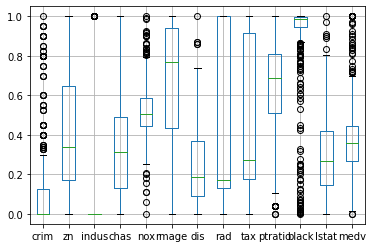

             crim        zn     indus      chas       nox     rmage       dis  \
crim     1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537  0.664408   
zn      -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779 -0.708027   
indus   -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518 -0.099176   
chas    -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470 -0.769230   
nox      0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265  0.205246   
rmage   -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000 -0.747881   
dis      0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881  1.000000   
rad     -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022 -0.494588   
tax     -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456 -0.534432   
ptratio -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515 -0.232471   
black    0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534  0.291512   
lstat   -0.412995  0.603800 

In [ ]:
import matplotlib.pyplot as plt
boxplot = DataScaled.boxplot(column=BHNames)
plt.show()
CorData = DataScaled.corr(method='pearson')
with pd.option_context('display.max_rows', None, 'display.max_columns', CorData.shape[1]):
  print(CorData)

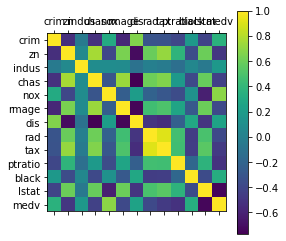

In [ ]:
plt.matshow(CorData)
plt.xticks(range(len(CorData.columns)), CorData.columns)
plt.yticks(range(len(CorData.columns)), CorData.columns)
plt.colorbar()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = DataScaled.drop('medv', axis = 1)
print('X shape = ',X.shape)
Y = DataScaled['medv']
print('Y shape = ',Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)
print('X train shape = ',X_train.shape)
print('X test shape = ', X_test.shape)
print('Y train shape = ', Y_train.shape)
print('Y test shape = ',Y_test.shape)

X shape =  (506, 12)
Y shape =  (506,)
X train shape =  (354, 12)
X test shape =  (152, 12)
Y train shape =  (354,)
Y test shape =  (152,)


In [ ]:
#import keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

#first input and first hidden layer
model = Sequential()
model.add(Dense(20,input_dim=13, activation='relu'))
        
#second hidden layer
model.add(Dense(10, activation='relu'))
        
#output layer
model.add(Dense(1, activation='linear'))
        
#compile ANN
model.compile(optimizer="Adam", loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
#fit and display the summary 
model.fit(X_train,Y_train, epochs=1000, verbose=1)
print(x_data[0:1].shape) 

ValueError: ignored



---

![alt text](https://)

> Indented block ![alt text](https:// [link text](https://))

